#### UCI ABALONE

- Sex가 M인 샘플에 대해,

     Length와 Height의 회귀선 긋고, SSE값 구해보기
    

- Sex가 F인 샘플에 대해,  
    
    * Whole weight 대비 Shucked weight, Vicera weight, Shell weight의 각 % 구성비
    
    * Male에 대해서도 구성비 구하기
    * Female, Male 간 각 구성비(%)의 mean 값에 차이가 있는지, 눈으로 살펴보기

x : x 값, scalar
X : x 값들의 집합(리스트)

$ \bar X $ : 평균
$ \hat X $ : 예측값

$ SSE = \sum_{i=0}^{n} (Y_i - \hat Y_i)^2 $

$ SST = \sum_{i=0}^{n} (Y_i - \bar Y)^2 $

$ SSR = \sum_{i=0}^{n} (\hat Y_i - \bar Y)^2 $


$ a\cdot b = \sum_{i=0}^{n} a_i b_i $

In [2]:
# Sex가 M인 샘플에 대해, Length와 Height의 회귀선 긋고, SSE값 구해보기

# Sex가 F인 샘플에 대해, Whole weight 대비, Shucked weight, Vicera weight, Shell weight의 각 % 구성비

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'
pd_data = pd.read_csv(url, header = None)
np_data = pd_data.to_numpy()
print(np_data[:5], np_data.shape)



[['M' 0.455 0.365 0.095 0.514 0.2245 0.101 0.15 15]
 ['M' 0.35 0.265 0.09 0.2255 0.0995 0.0485 0.07 7]
 ['F' 0.53 0.42 0.135 0.677 0.2565 0.1415 0.21 9]
 ['M' 0.44 0.365 0.125 0.516 0.2155 0.114 0.155 10]
 ['I' 0.33 0.255 0.08 0.205 0.0895 0.0395 0.055 7]] (4177, 9)


In [5]:
filter1 = np_data[:, 0] == 'M'
np_data[filter1]

array([['M', 0.455, 0.365, ..., 0.101, 0.15, 15],
       ['M', 0.35, 0.265, ..., 0.0485, 0.07, 7],
       ['M', 0.44, 0.365, ..., 0.114, 0.155, 10],
       ...,
       ['M', 0.59, 0.44, ..., 0.2145, 0.2605, 10],
       ['M', 0.6, 0.475, ..., 0.2875, 0.308, 9],
       ['M', 0.71, 0.555, ..., 0.3765, 0.495, 12]], dtype=object)

0.832620139331138


Text(0.2, 0.3, 'SSE: 0.5673949700538785')

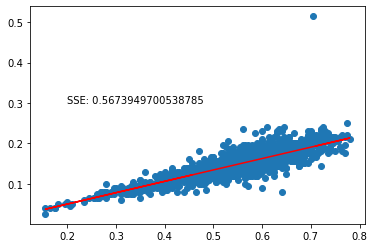

In [17]:
# Length : 1, height : 3

filter1 = np_data[:, 0] == 'M'
male = np_data[filter1]

xs = male[:, 1].astype(np.float64)
ys = male[:, 3].astype(np.float64)

xs_mean = xs.mean()
ys_mean = ys.mean()
xs_std = xs.std()
ys_std = ys.std()
xy_corr = np.corrcoef(xs, ys)[0,1]
print(xy_corr)

slope = xy_corr * (ys_std / xs_std)
intercept = ys_mean - (slope * xs_mean)

ys_pred = xs*slope+intercept
sse = np.sum((ys - ys_pred)**2)

_, axe = plt.subplots()
axe.scatter(xs, ys)
axe.plot(xs, xs*slope+intercept, c='r')
axe.annotate('SSE: {0}'.format(sse), xy=(0.2, 0.3))

Shucked 0.4232978625715364
Viscera 0.22136504174282245
Shell 0.292472678095641
********
Shucked 0.43068773690312573
Viscera 0.21850769250299112
Shell 0.29146055436012214


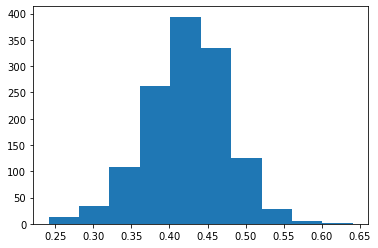

In [20]:
# whole weight, 4,5,6,7

filter1 = np_data[:, 0] == 'F'
female = np_data[filter1]

feature_names = ['Shucked', 'Viscera', 'Shell']
for i in range(5,8):
    t = female[:,i]/female[:,4]
    print(feature_names[i-5], t.mean())
    
t = female[:,5]/female[:,4]
_, axe = plt.subplots()
axe.hist(t)

print('********')

filter1 = np_data[:, 0] == 'M'
female = np_data[filter1]

feature_names = ['Shucked', 'Viscera', 'Shell']
for i in range(5, 8):
    t = female[:, i]/female[:,4]
    print(feature_names[i-5], t.mean())